## Doing a bit of Data Analysis 😎

This won't stay in the project but it's easier to do this in a notebook while developing

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
CSV_FILE = "data/full/cineasta_full.csv"

In [4]:
cineData = pd.read_csv(CSV_FILE, parse_dates=['Date'])
cineData = cineData.drop(columns=["Unnamed: 0"])

In [13]:
cineData.dtypes

OG_Title                object
TMDB_Title              object
Release_Date            object
Rating                 float64
Genre_IDs               object
MovieAge                object
Semester                object
Weekday                 object
Date            datetime64[ns]
Attendance               int64
dtype: object

In [5]:
cineData.head()

,OG_Title,TMDB_Title,Release_Date,Rating,Genre_IDs,MovieAge,Semester,Weekday,Date,Attendance
0,Kingsman 2,Kingsman: The Golden Circle,2017-09-20,6.969,"['Action', 'Adventure', 'Comedy']",202 days,Sommersemester,Tuesday,2018-04-10,87
1,Ferris Bueller's Day off,Ferris Bueller's Day Off,1986-06-11,7.605,['Comedy'],11627 days,Sommersemester,Wednesday,2018-04-11,16
2,Detroit,Detroit,2017-07-28,7.300,"['Crime', 'Drama', 'Thriller', 'History']",264 days,Sommersemester,Wednesday,2018-04-18,9
3,It,It,2017-09-06,7.243,"['Horror', 'Fantasy']",230 days,Sommersemester,Tuesday,2018-04-24,102
4,The Square,The Square,2017-08-25,6.765,['Drama'],243 days,Sommersemester,Wednesday,2018-04-25,30


In [6]:
#after covid
a_cov = cineData[cineData['Date'] > pd.to_datetime('2020-3-1')]
#before covid
b_cov = cineData[cineData['Date'] < pd.to_datetime('2020-3-1')]

In [7]:
print(f"Median before Covid: {b_cov['Attendance'].median()}")
print(f"Median after Covid: {a_cov['Attendance'].median()}")

Median before Covid: 33.0
Median after Covid: 9.0


In [10]:
semDiff_a = a_cov.groupby(['Semester']).Attendance.mean()
semDiff_b = b_cov.groupby(['Semester']).Attendance.mean()

In [ ]:
plt.bar(semDiff_b.index, semDiff_b.values, color = 'orange')
plt.bar(semDiff_a.index, semDiff_a.values, color='blue')
plt.xlabel('Semester')
plt.ylabel('Attendance')
plt.legend(['Before Covid', 'After Covid'])
plt.title("Median of Attendance")

In [233]:
#Anzahl der Sommersemester:
summer_mean = cineData[cineData['Semester'] == "Sommersemester"].groupby(cineData['Date'].dt.year)['Attendance'].mean()

In [132]:
def convert_inbetween(year1, year2='foo'):
    if year1 + 1 == year2:
        return str(year1) + " - " + str(year2)
    else:
        return str(year1) + " - " +str(year1 + 1)

In [231]:
def get_winter_attendance():
    win = cineData[cineData['Semester'] == "Wintersemester"].groupby(cineData['Date'].dt.year)['Attendance'].mean()
    part = cineData[cineData['Semester'] == "Wintersemester"].groupby(cineData['Date'].dt.year)['Attendance'].count()
    
    #calc the count of each wintersemester
    whole = (lambda x: [np.sum(part.values[i:i+2]) for i in range(x)]) (len(part)) [:-1]
    emp = {}
    
    for i, value in enumerate(win.values):
        try:
            #Stupid Fix: There is no entry for 2020 but 1920 exists
            if str(win.index[i]) == "2019":
                emp.update({convert_inbetween(win.index[i]) : value})
            else:
                emp.update({convert_inbetween(win.index[i], win.index[i+1]): 
                            # Probably how to not calc the wheigted mean:
                            # Sum of means multiplied by wheigts
                            np.sum(np.multiply(win.values[i:i+2],np.divide(part.values[i:i+2], whole[i])))})
        except Exception as e:
            pass
    return pd.Series(emp)

In [236]:
#Anzahl der Wintersemester:
winter_mean = get_winter_attendance()
full_means = pd.concat([winter_mean, summer_mean])

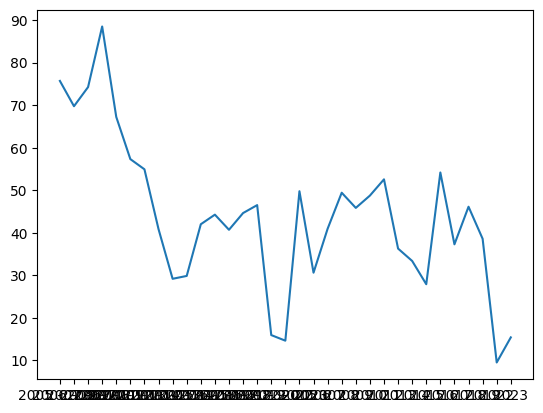

In [245]:
plt.plot(full_means.index.astype(str), full_means.values)